In [14]:
#from sklearn.neighbors import NearestNeighbors
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pandas as pa
import json as js
import networkx as nx
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt

In [15]:
file = open('export.json',)
data = js.load(file)
elements = data["elements"]
file.close()

In [16]:
def haversine(point1, point2):
    point1[0], point1[1], point2[0], point2[1] = map(radians, [point1[0], point1[1], point2[0], point2[1]])

    # haversine formula 
    dlon = point2[0] - point1[0] 
    dlat = point2[1] - point1[1] 
    a = sin(dlat/2)**2 + cos(point1[1]) * cos(point2[1]) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

In [17]:
lat1 = radians(elements[0]["lat"])
lon1 = radians(elements[0]["lon"])

lat2 = radians(elements[1]["lat"])
lon2 = radians(elements[1]["lon"])

print(haversine([lon1,lat1],[lon2,lat2]))

0.0014464648901505678


In [18]:
#regroupe les coordonnées en couple
nodesMap = {}
for e in elements:
    if (e["type"] == "node"):
        if("tags" in e):
            if("name" in e["tags"]):
                if(e["tags"]["name"].startswith("Aire")):
                    print(e["id"],e["tags"]["name"])
                    point = [e["lat"],e["lon"],1]
                else:
                    point = [e["lat"],e["lon"],0]
            else:
                point = [e["lat"],e["lon"],0]

        else:
            point = [e["lat"],e["lon"],0]
        # ajout dans le dictionnaire
        nodesMap.update({e["id"] : point})

print(nodesMap[1092718161])

21462872 Aire de Meillac
21463090 Aire de Bordeaux-Cestas
36133148 Aire de Cocumont
101439017 Aire de Lugos-Est
244598847 Aire d'Aquitaine Nord
245469652 Aire de Thouars
245469945 Aire de Thouars
249778863 Aire des Vignes Nord
255725311 Aire de Saugon
257156240 Aire des PalombiÃ¨res
313750636 Aire de la Gare de PÃ©age d'Arveyres
313753580 Aire des PalombiÃ¨res
315104278 Aire des Vignes Sud
315104887 Aire de la Gare de PÃ©age d'Arveyres
318151675 Aire des Terres de Graves
318182389 Aire des Terres de Graves
458755211 Aire de Cocumont
513717312 Aire de Bordeaux-Cestas
726554853 Aire de l'Estalot
736942879 Aire de Lugos-Ouest
778654326 Aire du Bazadais
987039211 Aire du Bazadais
1091814886 Aire de BÃ©denac Ouest
1876595132 Aire de Saint-Caprais
1893894292 Aire de CÃ©zac
2587088569 Aire de Boisredon
5761204260 Aire de Saugon
[44.2812476, -0.2325377, 0]


In [19]:
# créer un dictionnaire regroupant les coordonées des sations services/aires
points = {}
for e in elements:
    if (e["type"] == "way"):
        points.update({e["id"] : nodesMap[e["nodes"][0]]})

print(points)

#print(haversine(points.get(116545534),points.get(475295233)))

{4646237: [44.7799067, -0.5485072, 0], 5116814: [44.8079857, -0.5318097, 0], 5116827: [44.8050152, -0.5312477, 0], 5116828: [44.8055036, -0.5305562, 0], 5181895: [44.7727156, -0.5558113, 0], 5182230: [44.5450047, -0.2679919, 0], 5182232: [44.505076, -0.0397231, 0], 11398454: [44.4432662, -0.8108298, 0], 22929785: [44.805711, -0.5304623, 0], 22929794: [44.8096527, -0.524314, 0], 22929795: [44.8097643, -0.5243795, 0], 22929812: [44.8053627, -0.5307604, 0], 22929813: [44.8050902, -0.5313906, 0], 22929814: [44.8054312, -0.530887, 0], 22938590: [44.8845984, -0.5173074, 0], 22938594: [44.8787813, -0.5314682, 0], 22938722: [44.883181, -0.5539254, 0], 22938723: [44.8788637, -0.5314392, 0], 22938753: [44.8852241, -0.5614253, 0], 22938755: [44.8865621, -0.560586, 0], 22938796: [44.8880128, -0.5837678, 0], 22938798: [44.888159, -0.5838531, 0], 22938833: [44.8881627, -0.5859792, 0], 22938849: [44.8892865, -0.6000618, 0], 23133268: [45.0031393, -0.1273673, 0], 23133269: [45.0032155, -0.1274521, 0],

[5078638536, 22938755, 172481709]


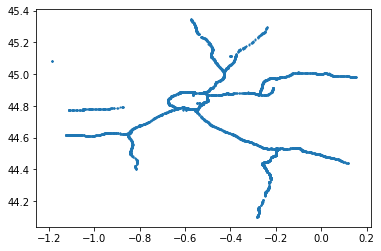

In [20]:
G = nx.Graph()

#TODO : Trouver un moyen de join les ways sans tout reparcourir.
# struct du map : (idNode,[nextNode,idWay1,<optional>idWay2])
nodeJunction = {}


# parcourir les types "way"
for nodes in elements:
    if (nodes["type"] == "way"):
        for i in range(len(nodes["nodes"])):

            if nodes["nodes"][i] in nodeJunction:
                if i == 0 : 
                  nodeJunction[nodes["nodes"][i]][0]=nodes["nodes"][i+1]  
                nodeJunction[nodes["nodes"][i]][2]=nodes["id"]

                # ({nodes["nodes"][i] : [ _,_ ,nodes["id"]]})

            elif i == (len(nodes["nodes"])-1):
                nodeJunction.update({nodes["nodes"][i] : [None,nodes["id"],None]})


            else : nodeJunction.update({nodes["nodes"][i] : [nodes["nodes"][i+1],nodes["id"],None]})
            # if (nodesMap[node][2] == 1):
            #     print(node,nodesMap[node])
print(nodeJunction[1833874724])

    #print(nodesMap[node[0]][0])
xpoints = []
ypoints = []
for node in nodeJunction.items():

        xpoints.append(nodesMap[node[0]][0])
        ypoints.append(nodesMap[node[0]][1])

latitude = np.array(xpoints)
longitude = np.array(ypoints)

plt.scatter(longitude,latitude,s=1)
plt.show()


In [21]:
#avec Graphe object
fig = go.Figure(data=go.Scattergeo(lon=longitude,lat=latitude))
fig.show()

In [22]:
def distanceAvecProchaineAire(aireDep,dist):
    voisin = nodeJunction[aireDep][0]
    if voisin is None :
        #print("error : no more Node")
        return 0,None
    if(nodesMap[voisin][2] == 1):
        return dist,voisin
    dist = dist + haversine([nodesMap[aireDep][0],nodesMap[aireDep][1]],[nodesMap[voisin][0],nodesMap[voisin][1]])
    return distanceAvecProchaineAire(voisin,dist)

dist = distanceAvecProchaineAire(29559290,0)
print(dist)

(4.900008609745544, 245469945)


In [23]:
def getFirstAire():
    for node in nodesMap.items():
        if node[1][2] == 1:
            return node[0]
#firstNode = list(nodeJunction.keys())[0]
firstAire = getFirstAire()
idNextNode = distanceAvecProchaineAire(firstAire,0)[1]
firstEdge = distanceAvecProchaineAire(firstAire,0)[0]
prevNode = None
prevEdge = None
graph = {}

# STRUCTURE GRAPH :

#graph = {node1 : {"previous" : [idPrev, edgePrev],
#                   "next" : [idNext,edgeNext]},
#          node2 {...},...
#  
# }
#graph = {firstAire : {"previous" : [{previousNode,previousEdge}],
#                    "next" : [{idNextNode,firstEdge}] }
#}


# TEST AVEC 2 NEXT (ne pas ajouter vraiment dans le graph):

# idNextNode2 = distanceAvecProchaineAire(firstNode,0)[1]
# firstEdge2 = distanceAvecProchaineAire(firstNode,0)[0]
# graph.update({245469945 : {"previous" : [{firstNode,firstEdge}],
#                           "next" : [{idNextNode,firstEdge},{idNextNode,firstEdge}]}
#                           })


#utilise nodeJunction et nodesMap
#nodeJunction = {nodeId, [voisin, way1,way2]}
def createGraph(fullGraph,curNode,prevNode,prevEdge):
    currentNode = curNode
    previousNode = prevNode
    previousEdge = prevEdge
    nextNode = distanceAvecProchaineAire(currentNode,0)[1]
    while not (currentNode in fullGraph):
        # il parcourir les autres noeuds pour retomber sur d'autres aires.
        # fin de chemin
        if distanceAvecProchaineAire(currentNode, 0)[1] == None:
            fullGraph.update({currentNode : {
            "previous" : [previousNode, previousEdge],
            "next" : [None, None]}})
            return fullGraph
        fullGraph.update({currentNode : {
            "previous" : [previousNode, previousEdge],
            "next" : [nextNode, distanceAvecProchaineAire(currentNode, 0)[0]]}})
        previousNode = currentNode
        currentNode = nextNode
        nextNode = distanceAvecProchaineAire(currentNode, 0)[1]
        previousEdge = distanceAvecProchaineAire(previousNode, 0)[0]
    fullGraph[currentNode]["previous"][0] = previousNode
    fullGraph[currentNode]["previous"][1] = previousEdge
    
    return fullGraph
    
    
#fullGraph = createGraph(graph,firstAire,prevNode,prevEdge)
#print(fullGraph)
print(distanceAvecProchaineAire(21462872,0))
def fullGraphV1():
    fullGraph = {}
    #parcourir les nodes
    prevNode = None
    listOfAires = []
    for node in nodesMap.items():
        # si prochain node est une aire
        if node[1][2] == 1:
            if node[0] not in fullGraph:
                createGraph(fullGraph,node[0],None,None)
                listOfAires.append(node[0])
    return fullGraph, listOfAires

fullGraph, listAires = fullGraphV1()
print(fullGraph)
print(listAires)
print(len(fullGraph))

(11.187014857897852, 1893894292)
{21462872: {'previous': [245469945, 47.20641349057218], 'next': [1893894292, 11.187014857897852]}, 1893894292: {'previous': [21462872, 11.187014857897852], 'next': [5761204260, 14.492811956797564]}, 5761204260: {'previous': [1893894292, 14.492811956797564], 'next': [2587088569, 16.15853477715604]}, 2587088569: {'previous': [5761204260, 16.15853477715604], 'next': [None, None]}, 21463090: {'previous': [101439017, 34.93112916317823], 'next': [None, None]}, 36133148: {'previous': [987039211, 13.803229750772447], 'next': [None, None]}, 101439017: {'previous': [None, None], 'next': [21463090, 34.93112916317823]}, 244598847: {'previous': [726554853, 22.084632079366965], 'next': [245469652, 25.378333980286158]}, 245469652: {'previous': [244598847, 25.378333980286158], 'next': [None, None]}, 245469945: {'previous': [None, None], 'next': [21462872, 47.20641349057218]}, 249778863: {'previous': [313753580, 24.75443173005103], 'next': [313750636, 17.895021802703326

In [24]:
def floydWarshall(graph):
    matrix = np.full((len(graph), len(graph)), float('inf'))
    indexes = {}
    for n in range(len(graph)):
        graphAsList = list(graph)
        #print(graphAsList[n])
        indexes.update({graphAsList[n]: n})
    for aire in graph:
        neighbour1 = graph[aire]["previous"][0]
        neighbour2 = graph[aire]["next"][0]
        if(neighbour1 != None):
            matrix[indexes[aire]][indexes[neighbour1]] = graph[aire]["previous"][1]
        if(neighbour2 != None):
            matrix[indexes[aire]][indexes[neighbour2]] = graph[aire]["next"][1]
    for k in graph:
        for i in graph:
            for j in graph:
                matrix[indexes[i]][indexes[j]] = min(matrix[indexes[i]][indexes[j]], matrix[indexes[i]][indexes[k]] + matrix[indexes[k]][indexes[j]])
    return matrix

floydWarshall(fullGraph)

array([[22.37402972, 11.18701486, 25.67982681, 41.83836159,         inf,
                inf,         inf,         inf,         inf, 47.20641349,
                inf,         inf,         inf,         inf,         inf,
                inf,         inf,         inf,         inf,         inf,
                inf,         inf,         inf,         inf,         inf,
                inf,         inf],
       [11.18701486, 22.37402972, 14.49281196, 30.65134673,         inf,
                inf,         inf,         inf,         inf, 58.39342835,
                inf,         inf,         inf,         inf,         inf,
                inf,         inf,         inf,         inf,         inf,
                inf,         inf,         inf,         inf,         inf,
                inf,         inf],
       [25.67982681, 14.49281196, 28.98562391, 16.15853478,         inf,
                inf,         inf,         inf,         inf, 72.88624031,
                inf,         inf,         inf,        